Data and codes for figure 6 to 11

Required files:
1. '../../results/"result names"/MM/rh_"risk measure"_copula_selection.csv' generated by run.ipynb; see result_names and risk_measures in the code below. 
2. '../../results/"risk measure"/MM/OHR_NIG.csv'. This file is avaliable in the repository; The generation of this file is upon request. 

In [13]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from mpl_toolkits.axes_grid1 import make_axes_locatable

import scipy.stats as ss
import seaborn as sns
import sys, os
sys.path.append('../../src/')
# import toolbox
from toolbox import *

result_names = ['BBT_Tiingo',                #0
                'BBT_future_Tiingo_ada', 
                'BBT_future_Tiingo_eth',     #2
                'BBT_future_Tiingo_ltc',
                'BBT_future_Tiingo_xrp',     #4
                'BBT_future_BITX',
                'BBT_future_BITW20',         #6
                'BBT_future_BITW70', 
                'BBT_future_BITW100',        #8
                'BBT_future_CRIX']

# risk_measures = ['Variance',
#                  'ES q=0.05', 'ES q=0.01',
#                  'VaR q=0.05', 'VaR q=0.01', 
#                  'ERM k=10', 'CH']

risk_measures = ['Variance',
                 'ES q=0.05', 'ES q=0.01',
                 'VaR q=0.05', 'VaR q=0.01', 
                 'ERM k=10']

risk_measures_names = ['Variance',
                 'ES 95%', 'ES 99%',
                 'VaR 95%', 'VaR 99%', 
                 'ERM k=10']



order = ['BBT_Tiingo',    
         'BBT_future_CRIX',  'BBT_future_BITX', 'BBT_future_BITW100', 
         'BBT_future_BITW20',  'BBT_future_BITW70',
         'BBT_future_Tiingo_ada', 'BBT_future_Tiingo_eth',  'BBT_future_Tiingo_ltc','BBT_future_Tiingo_xrp']

coin_names = ['bitcoin', 'CRIX', 'BITX', 'BITW100', 'BITW20', 'BITW70', 'ada', 'eth', 'ltc', 'xrp']

new_coin_names = ['CRIX', 'BITX', 'BITW100', 'BITW20', 'BITW70', 'ADA', 'ETH', 'LTC', 'XRP']

rm_len = len(risk_measures)
c_len = len(copula_names)

In [2]:
i = 1
rn = order[i]
path = '../../results/%s/MM/OHR_NIG.csv'%rn
_df = pd.read_csv(path)
list(np.unique(_df.copula))

copula = ['Clayton',
 'Frank',
 'Gauss Mix Indep',
 'Gaussian',
 'Gumbel',
 'NIG',
 'Plackett',
 'rotGumbel',
 't_Copula']


copula_names = [ 'Clayton',
 'Frank',
 'Gauss Mix Indep',
 'Gaussian',
 'Gumbel',
 'NIG',
 'Plackett',
 'rotGumbel',
 r'$t$-Copula']

In [3]:
start = []
for n in range(len(order)):
    rn = order[n]
    rm = 'ES q=0.05'
    path = '../../results/%s/MM/rh_%s_copula_selection.csv'\
                    %(rn, rm)
    
    df = pd.read_csv(path)
    df.Date = pd.to_datetime(df.Date)
    
    start.append(np.min(df.Date))
    
start = np.max(start)

In [7]:
# initiate a placeholder for MSE results
result_df = pd.DataFrame(np.zeros((len(copula), len(risk_measures))))

result_df.index = copula
result_df.columns = risk_measures

result_df

,Variance,ES q=0.05,ES q=0.01,VaR q=0.05,VaR q=0.01,ERM k=10
Clayton,0.0,0.0,0.0,0.0,0.0,0.0
Frank,0.0,0.0,0.0,0.0,0.0,0.0
Gauss Mix Indep,0.0,0.0,0.0,0.0,0.0,0.0
Gaussian,0.0,0.0,0.0,0.0,0.0,0.0
Gumbel,0.0,0.0,0.0,0.0,0.0,0.0
NIG,0.0,0.0,0.0,0.0,0.0,0.0
Plackett,0.0,0.0,0.0,0.0,0.0,0.0
rotGumbel,0.0,0.0,0.0,0.0,0.0,0.0
t_Copula,0.0,0.0,0.0,0.0,0.0,0.0


In [8]:
# generate MSE data
for i in range(len(order)):
    rn = order[i]
    print(rn)

    path = '../../results/%s/MM/OHR_NIG.csv'%rn
    df = pd.read_csv(path)

    for C_name in copula:
        for rm_name in risk_measures:
            C_id = df.copula == C_name
            R_id = df.loc[:,'risk measure'] == rm_name

            _df = df.loc[C_id&R_id,:]

            Rh_arr = []
            for l in range(len(_df)):
                row = _df.iloc[l,:]
                f = row.file
                h = row.OHR

                test = pd.read_csv('../../processed_data/%s/test/%s'%(rn, f))
                
                if np.mean(pd.to_datetime(test.Date) >= start):
                    Rs = np.exp(test.loc[:, 'log return '+coin_names[i]])-1
                    Rf = np.exp(test.loc[:, 'log return future'])-1

                    Rh = list(Rs-h*Rf)
                    Rh_arr+=Rh
            result_df.loc[C_name, rm_name] =  np.mean(np.array(Rh_arr)**2)
            result_df.to_csv('Rh_MM_MSE_%s.csv'%rn)     

BBT_Tiingo
BBT_future_CRIX
BBT_future_BITX
BBT_future_BITW100
BBT_future_BITW20
BBT_future_BITW70
BBT_future_Tiingo_ada
BBT_future_Tiingo_eth
BBT_future_Tiingo_ltc
BBT_future_Tiingo_xrp


In [9]:
# generate seim variance data
for i in range(len(order)):
    rn = order[i]
    print(rn)

    path = '../../results/%s/MM/OHR_NIG.csv'%rn
    df = pd.read_csv(path)

    for C_name in copula:
        for rm_name in risk_measures:
            C_id = df.copula == C_name
            R_id = df.loc[:,'risk measure'] == rm_name

            _df = df.loc[C_id&R_id,:]

            Rh_arr = []
            for l in range(len(_df)):
                row = _df.iloc[l,:]
                f = row.file
                h = row.OHR

                test = pd.read_csv('../../processed_data/%s/test/%s'%(rn, f))
                if np.mean(pd.to_datetime(test.Date) >= start):
                    Rs = np.exp(test.loc[:, 'log return '+coin_names[i]])-1
                    Rf = np.exp(test.loc[:, 'log return future'])-1

                    Rh = list(Rs-h*Rf)
                    Rh_arr+=Rh
                    
            Rh_arr = np.array(Rh_arr)  
            semiVariance = np.mean((Rh_arr[Rh_arr<=np.mean(Rh_arr)])**2)
            result_df.loc[C_name, rm_name] =  semiVariance
            result_df.to_csv('Rh_MM_semiVariance_%s.csv'%rn)     

BBT_Tiingo
BBT_future_CRIX
BBT_future_BITX
BBT_future_BITW100
BBT_future_BITW20
BBT_future_BITW70
BBT_future_Tiingo_ada
BBT_future_Tiingo_eth
BBT_future_Tiingo_ltc
BBT_future_Tiingo_xrp


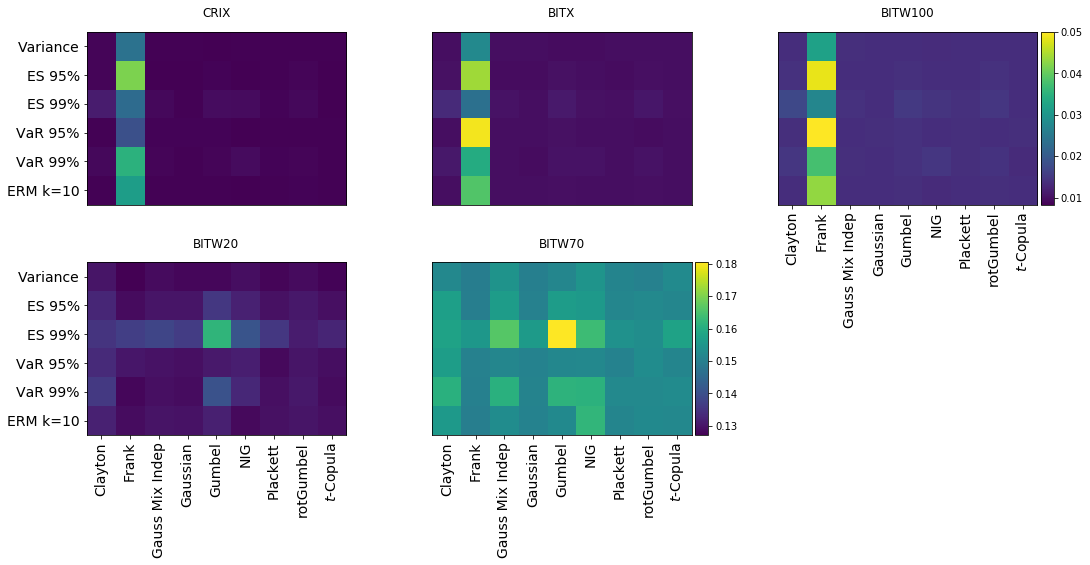

In [14]:
# figure 6
row1 = ['BBT_future_CRIX', 'BBT_future_BITX', 'BBT_future_BITW100']
row2 = ['BBT_future_BITW20', 'BBT_future_BITW70']

new_coin_names_group = [['CRIX', 'BITX', 'BITW100'],
                        ['BITW20', 'BITW70']]

colorScales = []
row_arr = [row1, row2]

for i, row in enumerate(row_arr):
    _min = 100
    _max = -100
    for j, rn in enumerate(row):
        path = 'Rh_MM_MSE_%s.csv'%rn
        df = pd.read_csv(path, index_col='Unnamed: 0')
        df*=100
        
        _max = np.max([_max, np.max(np.max(df))])
        _min = np.min([_min, np.min(np.min(df))])
        
    colorScales.append(np.array([_min, _max]))


fig = plt.figure()
factor = 0.1

ax1 = plt.axes([0, 
                rm_len*factor+factor+0.1,
                c_len*factor,
                rm_len*factor])

ax2 = plt.axes([(c_len*factor+factor)*0.8,
                rm_len*factor+factor+0.1, 
                c_len*factor,
                rm_len*factor])

ax3 = plt.axes([2*(c_len*factor+factor)*0.8,
                rm_len*factor+factor+0.1,
                c_len*factor,
                rm_len*factor])

# row 2
ax4 = plt.axes([0,
                0,
                c_len*factor,
                rm_len*factor])

ax5 = plt.axes([(c_len*factor+factor)*0.8,
                0,
                c_len*factor,
                rm_len*factor])

ax_arr = [ax1,ax2,ax3,ax4,ax5]

indices =  ['BBT_future_CRIX', 'BBT_future_BITX', 'BBT_future_BITW100', 'BBT_future_BITW20', 'BBT_future_BITW70']
indice_names = ['CRIX', 'BITX', 'BITW100', 'BITW20', 'BITW70']


for i, rn in enumerate(indices):
    path = 'Rh_MM_MSE_%s.csv'%rn
    df = pd.read_csv(path, index_col='Unnamed: 0')
    df *=100
    
    if i in [0,1,2]:
        im = ax_arr[i].matshow(df.T, vmin=colorScales[0][0], vmax=colorScales[0][1])
    else:
        im = ax_arr[i].matshow(df.T, vmin=colorScales[1][0], vmax=colorScales[1][1])

        
    ax_arr[i].set_title(indice_names[i])
    divider = make_axes_locatable(ax_arr[i])
    cax = divider.append_axes('right', size='5%', pad=0.05)

    if i in [2,4]:
        cbar = fig.colorbar(im, cax=cax, orientation='vertical')

    else:
        cbar = fig.colorbar(im, cax=cax, orientation='vertical', filled=False)
        cbar.set_ticks([])
        cbar.outline.set_visible(False)
    
    if i in [0, 3]:
        ax_arr[i].set_yticklabels(['']+risk_measures_names, fontsize=14)
    else:
        ax_arr[i].set_yticks([])

    if i in [2,3,4]:
        ax_arr[i].xaxis.set_ticks_position('bottom')
        ax_arr[i].set_xticklabels(['']+copula_names, fontsize=14, rotation=90)
    else:
        ax_arr[i].set_xticks([])
# plt.savefig('../../latex/_pics/MSE_indices.png', transparent=True, bbox_inches='tight')

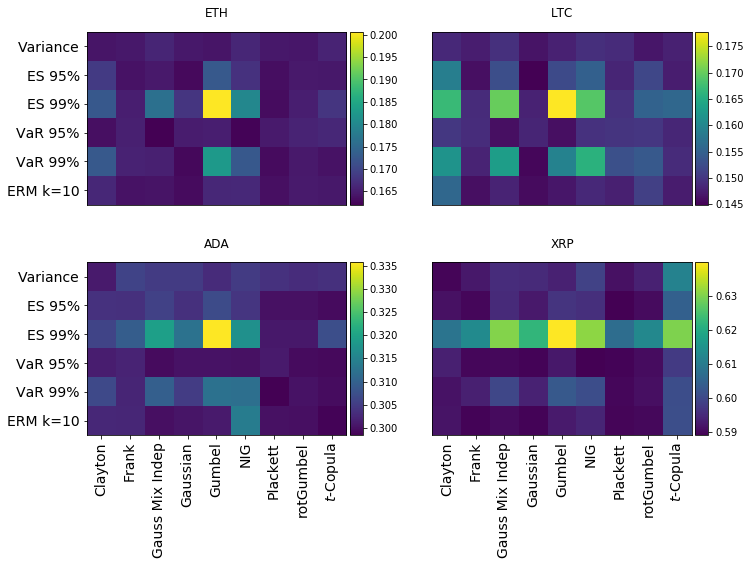

In [16]:
# figure 7
fig = plt.figure()
factor = 0.1

ax1 = plt.axes([0, 
                rm_len*factor+factor+0.1,
                c_len*factor,
                rm_len*factor])

ax2 = plt.axes([(c_len*factor+factor)*0.8,
                rm_len*factor+factor+0.1, 
                c_len*factor,
                rm_len*factor])

# row 2
ax4 = plt.axes([0,
                0,
                c_len*factor,
                rm_len*factor])

ax5 = plt.axes([(c_len*factor+factor)*0.8,
                0,
                c_len*factor,
                rm_len*factor])

ax_arr = [ax1,ax2 ,ax4,ax5]

cryptos = ['BBT_future_Tiingo_eth','BBT_future_Tiingo_ltc', 'BBT_future_Tiingo_ada', 'BBT_future_Tiingo_xrp']
crypto_names = ['ETH', 'LTC', 'ADA', 'XRP']


for i, rn in enumerate(cryptos):
    path = 'Rh_MM_MSE_%s.csv'%rn
    df = pd.read_csv(path, index_col='Unnamed: 0')
    df *=100
#     ax_arr[i].matshow(df.T)
    
    im = ax_arr[i].matshow(df.T)
    ax_arr[i].set_title(crypto_names[i])

    divider = make_axes_locatable(ax_arr[i])
    cax = divider.append_axes('right', size='5%', pad=0.05)
    cbar = fig.colorbar(im, cax=cax, orientation='vertical')
    
    if i in [0, 2]:
        ax_arr[i].set_yticklabels(['']+risk_measures_names, fontsize=14)
    else:
        ax_arr[i].set_yticks([])

    if i in [2,3]:
        ax_arr[i].xaxis.set_ticks_position('bottom')
        ax_arr[i].set_xticklabels(['']+copula_names, fontsize=14, rotation=90)
    else:
        ax_arr[i].set_xticks([])
# plt.savefig('../../latex/_pics/MSE_cryptos.png', transparent=True, bbox_inches='tight')

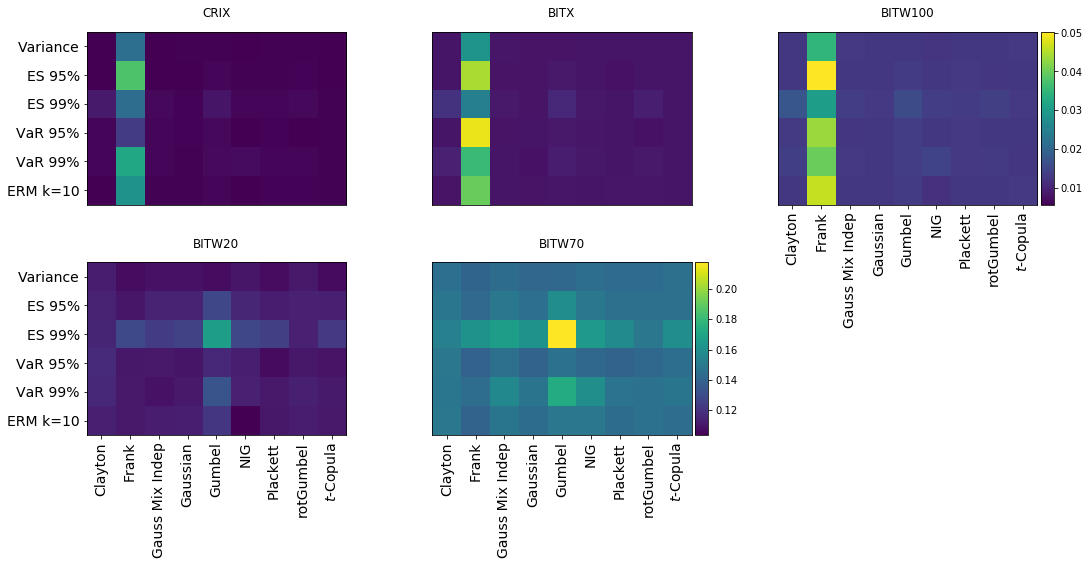

In [17]:
# figure 8
row1 = ['BBT_future_CRIX', 'BBT_future_BITX', 'BBT_future_BITW100']
row2 = ['BBT_future_BITW20', 'BBT_future_BITW70']

new_coin_names_group = [['CRIX', 'BITX', 'BITW100'],
                        ['BITW20', 'BITW70']]

colorScales = []
row_arr = [row1, row2]#, row3, row4]

for i, row in enumerate(row_arr):
    _min = 100
    _max = -100
    for j, rn in enumerate(row):
        path = 'Rh_MM_semiVariance_%s.csv'%rn
        df = pd.read_csv(path, index_col='Unnamed: 0')
        df*=100
        
        _max = np.max([_max, np.max(np.max(df))])
        _min = np.min([_min, np.min(np.min(df))])
        
    colorScales.append(np.array([_min, _max]))


fig = plt.figure()
factor = 0.1

ax1 = plt.axes([0, 
                rm_len*factor+factor+0.1,
                c_len*factor,
                rm_len*factor])

ax2 = plt.axes([(c_len*factor+factor)*0.8,
                rm_len*factor+factor+0.1, 
                c_len*factor,
                rm_len*factor])

ax3 = plt.axes([2*(c_len*factor+factor)*0.8,
                rm_len*factor+factor+0.1,
                c_len*factor,
                rm_len*factor])

# row 2
ax4 = plt.axes([0,
                0,
                c_len*factor,
                rm_len*factor])

ax5 = plt.axes([(c_len*factor+factor)*0.8,
                0,
                c_len*factor,
                rm_len*factor])

ax_arr = [ax1,ax2,ax3,ax4,ax5]

indices =  ['BBT_future_CRIX', 'BBT_future_BITX', 'BBT_future_BITW100', 'BBT_future_BITW20', 'BBT_future_BITW70']
indice_names = ['CRIX', 'BITX', 'BITW100', 'BITW20', 'BITW70']


for i, rn in enumerate(indices):
    path = 'Rh_MM_semiVariance_%s.csv'%rn
    df = pd.read_csv(path, index_col='Unnamed: 0')
    df *=100
    
    if i in [0,1,2]:
        im = ax_arr[i].matshow(df.T, vmin=colorScales[0][0], vmax=colorScales[0][1])
    else:
        im = ax_arr[i].matshow(df.T, vmin=colorScales[1][0], vmax=colorScales[1][1])

        
    ax_arr[i].set_title(indice_names[i])
    divider = make_axes_locatable(ax_arr[i])
    cax = divider.append_axes('right', size='5%', pad=0.05)

    if i in [2,4]:
        cbar = fig.colorbar(im, cax=cax, orientation='vertical')

    else:
        cbar = fig.colorbar(im, cax=cax, orientation='vertical', filled=False)
        cbar.set_ticks([])
        cbar.outline.set_visible(False)
    
    if i in [0, 3]:
        ax_arr[i].set_yticklabels(['']+risk_measures_names, fontsize=14)
    else:
        ax_arr[i].set_yticks([])

    if i in [2,3,4]:
        ax_arr[i].xaxis.set_ticks_position('bottom')
        ax_arr[i].set_xticklabels(['']+copula_names, fontsize=14, rotation=90)
    else:
        ax_arr[i].set_xticks([])
# plt.savefig('../../latex/_pics/semiVariance_indices.png', transparent=True, bbox_inches='tight')

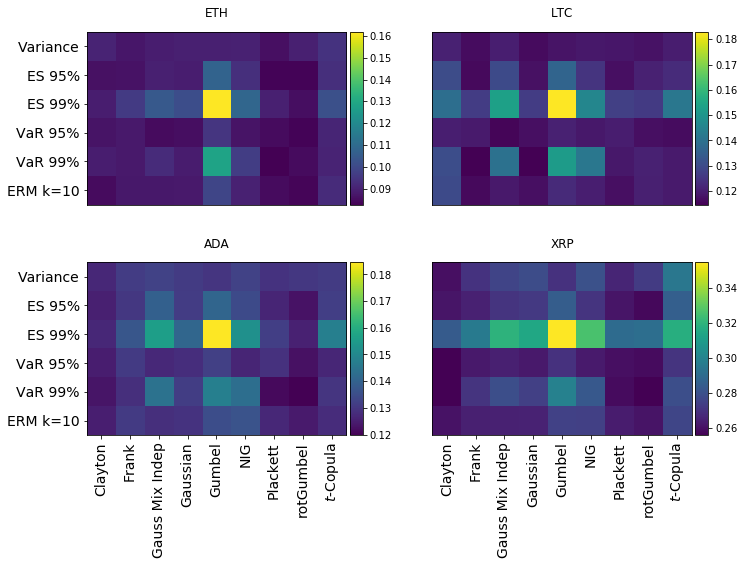

In [18]:
# figure 9
fig = plt.figure()
factor = 0.1

ax1 = plt.axes([0, 
                rm_len*factor+factor+0.1,
                c_len*factor,
                rm_len*factor])

ax2 = plt.axes([(c_len*factor+factor)*0.8,
                rm_len*factor+factor+0.1, 
                c_len*factor,
                rm_len*factor])

# row 2
ax4 = plt.axes([0,
                0,
                c_len*factor,
                rm_len*factor])

ax5 = plt.axes([(c_len*factor+factor)*0.8,
                0,
                c_len*factor,
                rm_len*factor])

ax_arr = [ax1,ax2 ,ax4,ax5]

cryptos = ['BBT_future_Tiingo_eth','BBT_future_Tiingo_ltc', 'BBT_future_Tiingo_ada', 'BBT_future_Tiingo_xrp']
crypto_names = ['ETH', 'LTC', 'ADA', 'XRP']


for i, rn in enumerate(cryptos):
    path = 'Rh_MM_semiVariance_%s.csv'%rn
    df = pd.read_csv(path, index_col='Unnamed: 0')
    df *=100
#     ax_arr[i].matshow(df.T)
    
    im = ax_arr[i].matshow(df.T)
    ax_arr[i].set_title(crypto_names[i])

    divider = make_axes_locatable(ax_arr[i])
    cax = divider.append_axes('right', size='5%', pad=0.05)
    cbar = fig.colorbar(im, cax=cax, orientation='vertical')
    
    if i in [0, 2]:
        ax_arr[i].set_yticklabels(['']+risk_measures_names, fontsize=14)
    else:
        ax_arr[i].set_yticks([])

    if i in [2,3]:
        ax_arr[i].xaxis.set_ticks_position('bottom')
        ax_arr[i].set_xticklabels(['']+copula_names, fontsize=14, rotation=90)
    else:
        ax_arr[i].set_xticks([])
        
# plt.savefig('../../latex/_pics/semiVariance_cryptos.png', transparent=True, bbox_inches='tight')

BBT_Tiingo


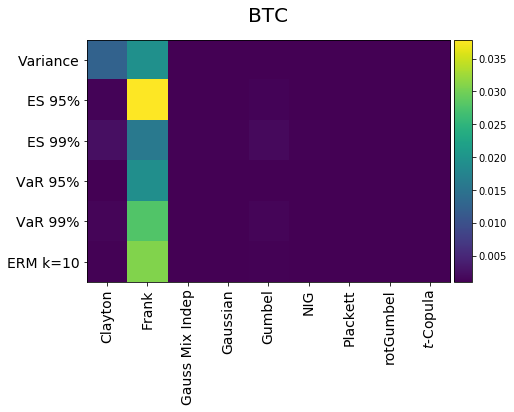

In [24]:
# figure 10
i=0
rn = order[i]
print(rn)
path = 'Rh_MM_MSE_%s.csv'%rn
df = pd.read_csv(path, index_col='Unnamed: 0')
df*=100

factor = 2.3
fig, ax = plt.subplots(figsize=(9*factor/3,6*factor/3), nrows=1, ncols=1)

im = ax.matshow(df.T, interpolation='nearest')
divider = make_axes_locatable(ax)

ax.set_yticklabels(['']+risk_measures_names, fontsize=14)
ax.set_xticklabels(['']+copula_names, fontsize=14, rotation=90)
ax.xaxis.set_ticks_position('bottom')

cax = divider.append_axes('right', size='5%', pad=0.05)
fig.colorbar(im, cax=cax, orientation='vertical')

ax.set_title('BTC', fontsize=20)
plt.subplots_adjust(wspace=.125, hspace=0.2)

# plt.savefig('../../latex/_pics/MSE_BTC.pdf', transparent=True, bbox_inches = "tight")

BBT_Tiingo


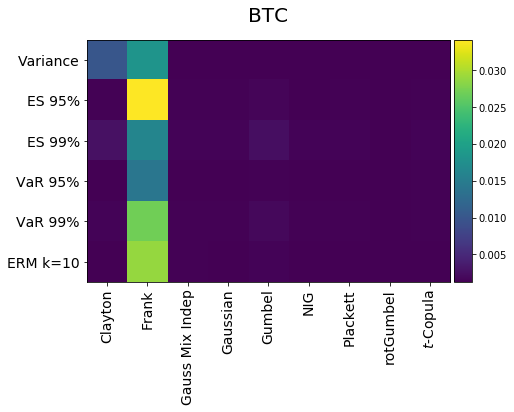

In [25]:
# figure 11
i=0
rn = order[i]
print(rn)
path = 'Rh_MM_semiVariance_%s.csv'%rn
df = pd.read_csv(path, index_col='Unnamed: 0')
df*=100

factor = 2.3
fig, ax = plt.subplots(figsize=(9*factor/3,6*factor/3), nrows=1, ncols=1)

im = ax.matshow(df.T, interpolation='nearest')
divider = make_axes_locatable(ax)

ax.set_yticklabels(['']+risk_measures_names, fontsize=14)
ax.set_xticklabels(['']+copula_names, fontsize=14, rotation=90)
ax.xaxis.set_ticks_position('bottom')

cax = divider.append_axes('right', size='5%', pad=0.05)
fig.colorbar(im, cax=cax, orientation='vertical')

ax.set_title('BTC', fontsize=20)
plt.subplots_adjust(wspace=.125, hspace=0.2)

# plt.savefig('../../latex/_pics/MSE_BTC.pdf', transparent=True, bbox_inches = "tight")